In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD4 import PD4
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [2]:
printing = False 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [8]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 2.5e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 200e-3 # want 100 mOhm 
ahole = 49e-12
l_overlaps = [8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6,24e-6, 30e-6] # radius of fin connector
l_fins = [ 100e-6,  125e-6, 150e-6,175e-6, 200e-6, 225e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

## Initial Specs
* $n_{fin} = 6$
* $l_{tes} = 140 \mu m$
* $w_{tes} = 2.5 \mu m$
* $h_{fin} = 600 nm$
* $R_{n} = 200 m\Omega$

<IPython.core.display.Javascript object>


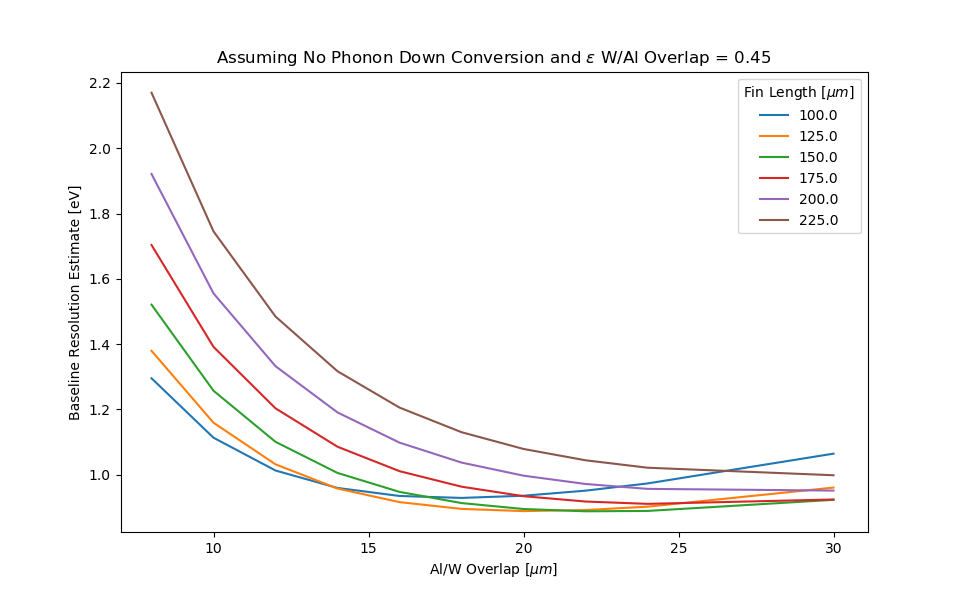

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.006841282743236272
Percent Passive SA      0.0010998839617181648
Percent QP Absorb SA    0.007941166704954436
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.2571259089861617
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.006841282743236272
Percent Passive SA      0.0010998839617181648
Percent QP Absorb SA    0.007941166704954436
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         0.8948103075847227
INVALID DESIGN!!!
Fin Length              0.00015
Overlap                 2.4e-05
Percent Active SA    

In [12]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6 or l_over == 24e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


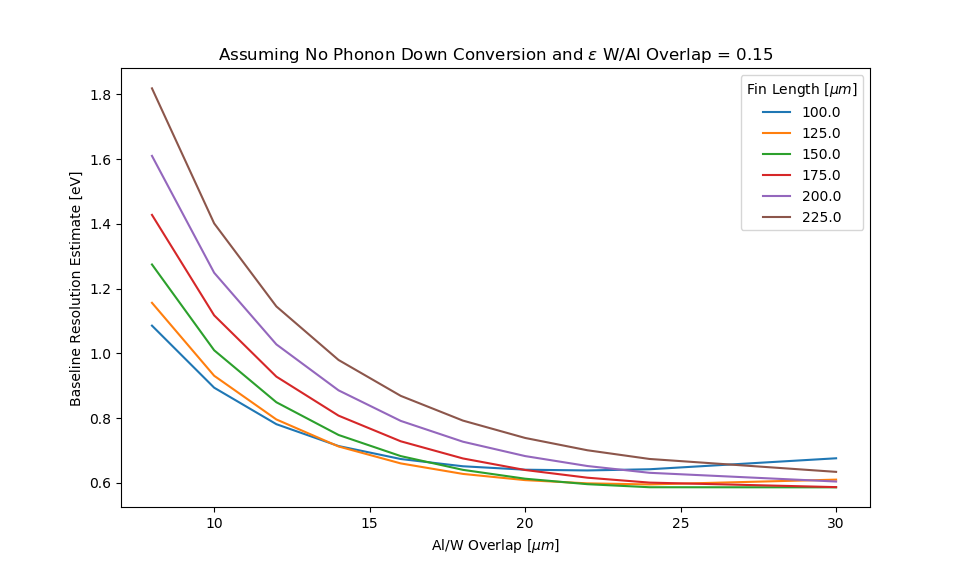

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.0094087499229791
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         0.6125923609586856
Fin Length              0.000175
Overlap                 1e-05
Percent Active SA       0.009003947349379766
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.19890600143574386
Phonon Absorption Time  4.240643474378908e-05
Time ETF       

In [15]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.15, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.15")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


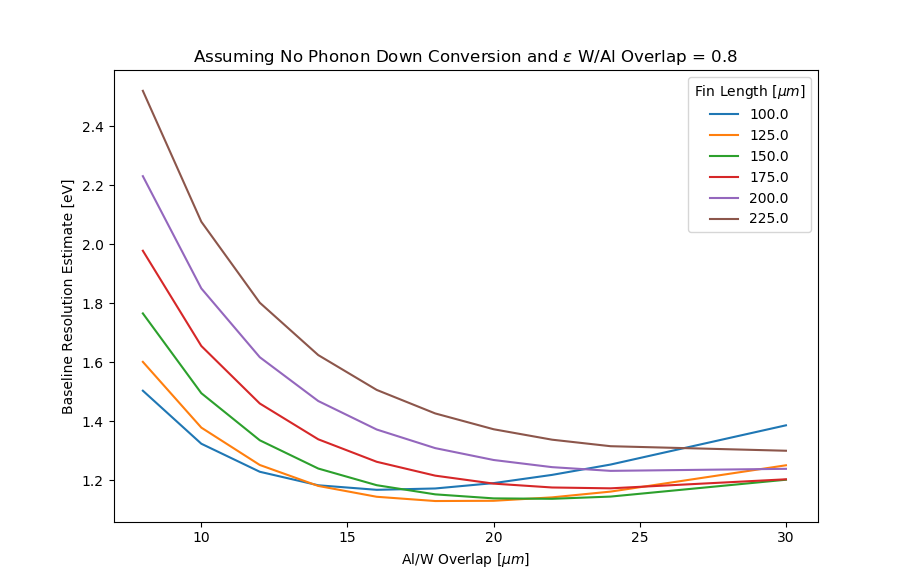

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.4951259697557364
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         1.138860945590206
Fin Length              0.000175
Overlap                 1e-05
Percent Active SA       0.009003947349379766
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.19890600143574386
Phonon Absorption Time  4.240643474378908e-05
Time ETF        

In [18]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.8, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.8")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


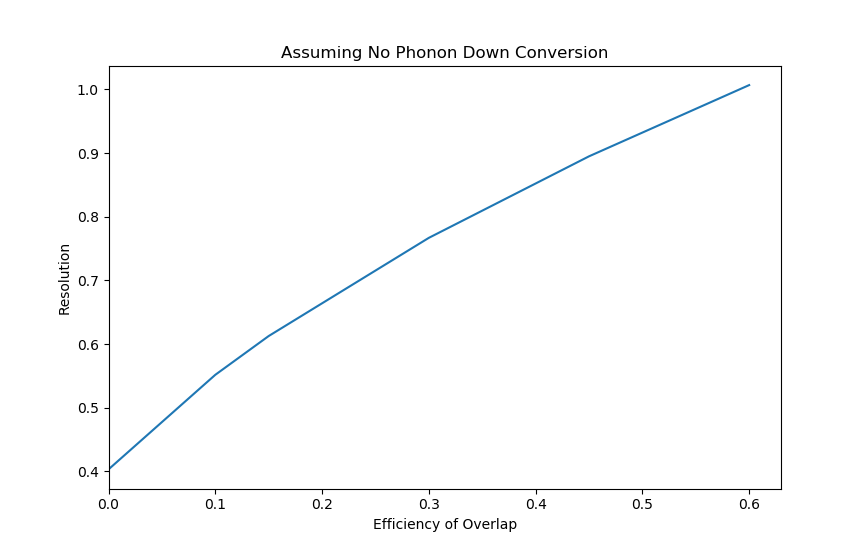

In [21]:
l_f = 150e-6 
l_over = 20e-6

# Check Robustness of Design
effic = [0, .1, .15, .3, .45, .6]
sig = []
f, ax = plt.subplots(1)
for ef in effic:
    tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, ef, tungsten , printing)
    qet = QET( l_f, h_fin, tes, ahole)
    det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
    e_res = simulate_noise(det)
    sig.append(e_res)
    fin_string = "{}"
ax.plot(effic, sig )
ax.set_title("Assuming No Phonon Down Conversion")
ax.set_xlim(xmin =0)
ax.set_xlabel("Efficiency of Overlap")
ax.set_ylabel("Resolution")
plt.show()

In [22]:
n_fin = 8
res_n = 200e-3 # want 100 mOhm 

Increase $n_{fin}$ from 6 to 8. But can't have both 8 $20\mu m$ overlap fin connectors *and* $140 \mu m$ long TES.  

<IPython.core.display.Javascript object>


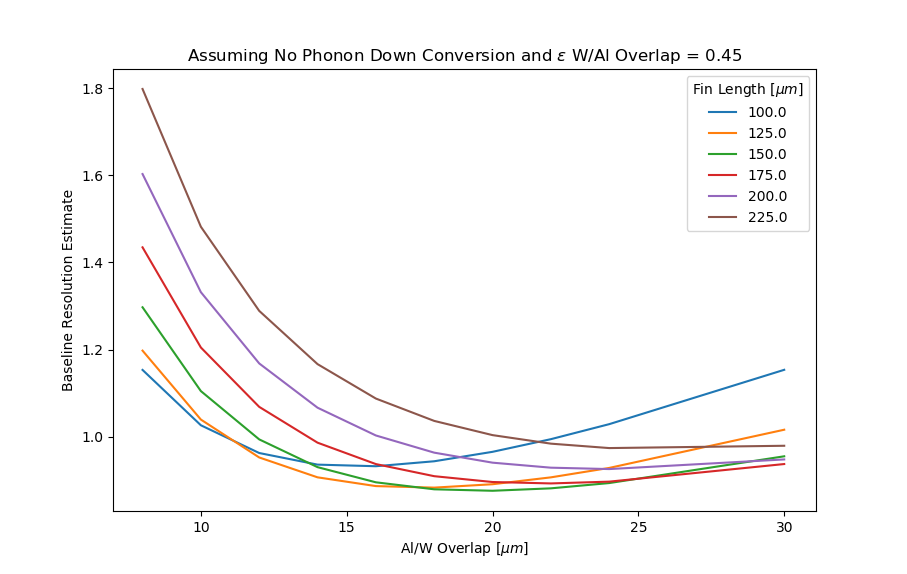

8  Fins
Fin Length              0.00015
Percent Active SA       0.006690946273077156
TES l                   0.00014
overlap                 1e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.493776293727047e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         1.1047915372516512
8  Fins
Fin Length              0.00015
Percent Active SA       0.006690946273077156
TES l                   0.00014
overlap                 1.2e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.493776293727047e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         0.9939662385525023
INVALID DESIGN!!!
8  Fins
Fin Length              0.00015
Percent Active SA       0.006690946273077156
TES l                   0.00014
overlap                 2e-05
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.493776293727047e-05
Time ET

In [26]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten,  printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print(n_fin, " Fins")
            print("Fin Length             ", l_f)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("TES l                  ", det._tes._l)
            print("overlap                ", l_over)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin = 7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [27]:
n_fin =4
tes_l = 100e-6 

<IPython.core.display.Javascript object>


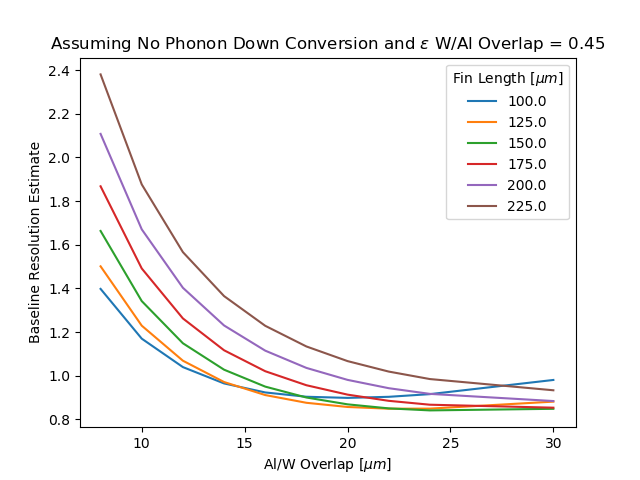

Fin Length                 0.0001
Overlap                    1e-05
-- Percent Active SA       0.0021864269256390277
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  0.00013481307820558132
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         1.1700129720416483
Fin Length                 0.0001
Overlap                    1.2e-05
-- Percent Active SA       0.0021864269256390277
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Time  0.00013481307820558132
-- Time ETF                6.666815483629355e-05
-- BASE RESOLUTION         1.0397189193643745
Fin Length                 0.0001
Overlap                    2e-05
-- Percent Active SA       0.0021864269256390277
-- N tes                   480
-- tes length              0.0001
-- Rn                      0.19999999999999998
-- Phonon Absorption Tim

In [30]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 100e-6 or l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6) :
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


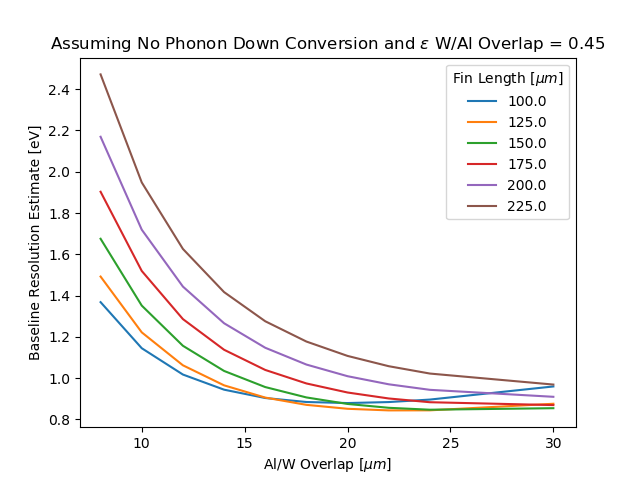

Fin Length                 0.000125
Overlap                    1e-05
-- N fins                  4
-- Percent Active SA       0.004351008300750483
-- N tes                   640
-- tes length              0.0001
-- Rn                      0.14999999999999997
-- Phonon Absorption Time  7.854919595446742e-05
-- Time ETF                7.233904574297787e-05
-- BASE RESOLUTION         1.2219711290924224
Fin Length                 0.000125
Overlap                    1.2e-05
-- N fins                  4
-- Percent Active SA       0.004351008300750483
-- N tes                   640
-- tes length              0.0001
-- Rn                      0.14999999999999997
-- Phonon Absorption Time  7.854919595446742e-05
-- Time ETF                7.233904574297787e-05
-- BASE RESOLUTION         1.062395682706069
Fin Length                 0.00015
Overlap                    1e-05
-- N fins                  4
-- Percent Active SA       0.006055289336557927
-- N tes                   640
-- tes length      

In [34]:
res_n = 150e-3 
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6) :
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- N fins                 ", n_fin)
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin = 7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


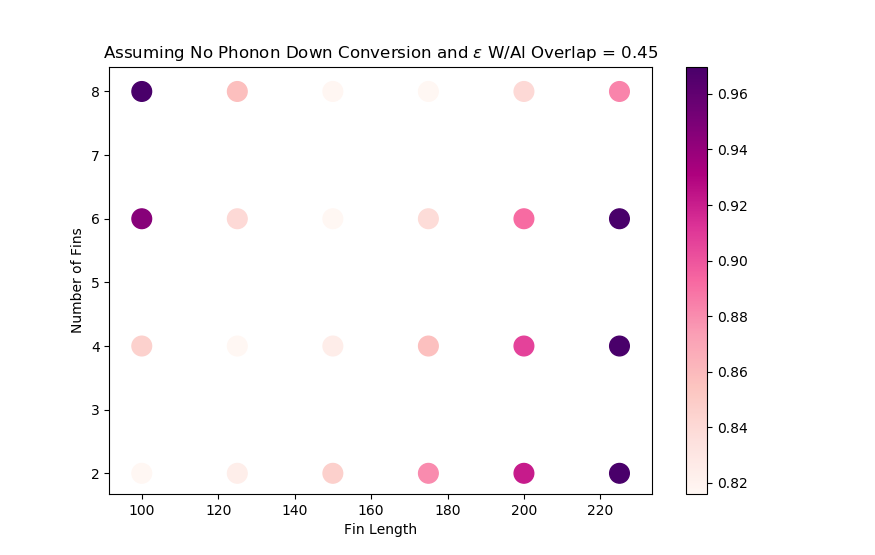

Active Surface Area  3.0544482862692834e-05
Percent Active SA  0.0032632562255628618
N tes  480
Base Resolution  0.8570032767339435
Rn  0.19999999999999998
Phonon Absorption Time  0.0001008511952682163
Time ETF  6.666815483629353e-05
Active Surface Area  4.150357421169301e-05
Percent Active SA  0.004434083809447649
N tes  480
Base Resolution  0.8212270345382235
Rn  0.19999999999999998
Phonon Absorption Time  7.915690650217028e-05
Time ETF  6.666815483629355e-05


In [38]:
l_over = 20e-6 

n_fins = [2,4,6,8]
f, ax = plt.subplots(1)
for n in n_fins:
    sigma_e = []
    n_f = [n]*len(l_fins_mu)
    for l_f in l_fins: 
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if n == 6 and l_f == 150e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
        if n == 4 and l_f == 125e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    plt.scatter(l_fins_mu, n_f,  s=200, c=sigma_e, cmap = 'RdPu')
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlabel("Fin Length")
ax.set_ylabel("Number of Fins")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


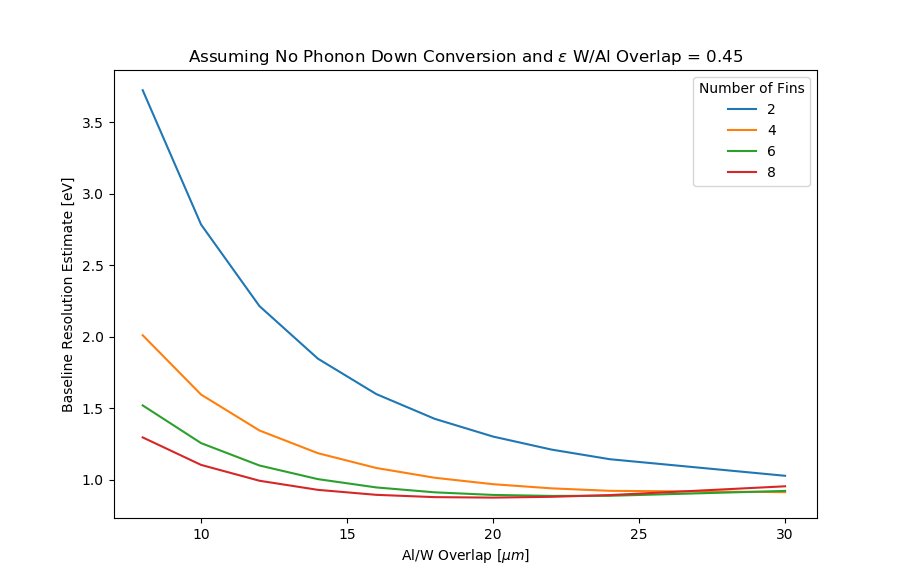

2  FINS
---------------------------------------------
-- overlap                 2e-05
-- TES length              0.00014
-- Percent Active SA       0.007141955683554503
-- N tes                   672
-- Fin Length              0.00015
-- Rn                      0.19999999999999993
-- QP Eff                  0.23137633545685085
-- Phonon Absorption Time  5.193146226391359e-05
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         1.3028605523333125
4  FINS
---------------------------------------------
-- overlap                 2e-05
-- TES length              0.00014
-- Percent Active SA       0.006991619213395387
-- N tes                   672
-- Fin Length              0.00015
-- Rn                      0.19999999999999993
-- QP Eff                  0.4017490218659637
-- Phonon Absorption Time  5.28963253502892e-05
-- Time ETF                6.666815483629353e-05
-- BASE RESOLUTION         0.9698395792635777
6  FINS
---------------------------------------------


In [42]:
l_f = 150e-6
res_n = 200e-3
tes_l = 140e-6

f, ax = plt.subplots(1)
for n in n_fins:
    print(n, " FINS")
    print("---------------------------------------------")
    sigma_e = []
    for l_over in l_overlaps: 
        perim = tes_l*2 + 14e-6*2 - 6e-6*n
        overlap_p = n*l_over*2
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_over == 20e-6:
            if overlap_p > perim:
                print("INVALID DESIGN!!!")
            print("-- overlap                ", l_over)
            print("-- TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- Fin Length             ", l_f)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- QP Eff                 ", det._qet._eQPabsb)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(n) )
plt.legend(title = "Number of Fins")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

6  FINS
--------------------------------------------------------------------


<IPython.core.display.Javascript object>


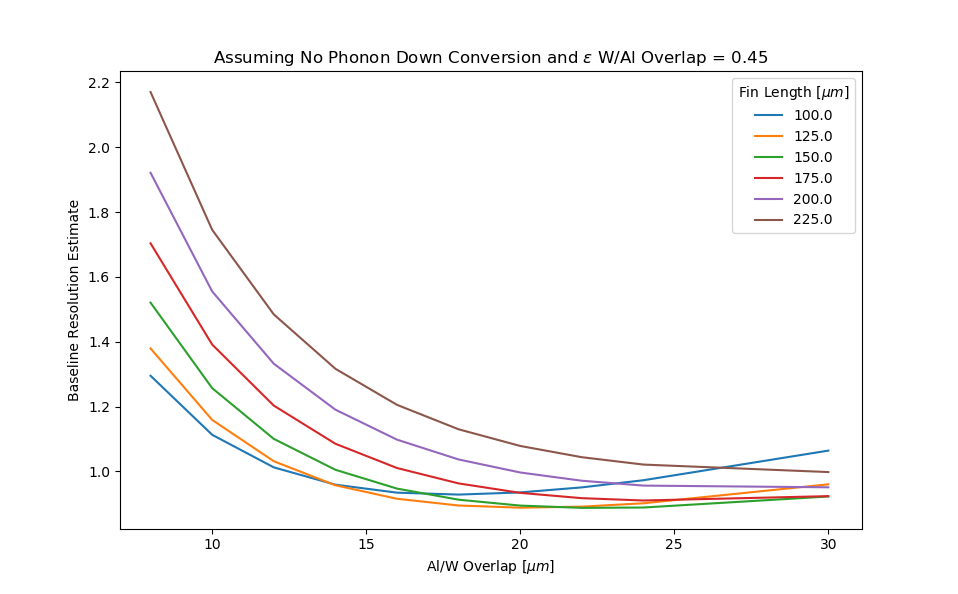

Ovelap                  1.4e-05
TES length              0.00014
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629352e-05
BASE RESOLUTION         1.0053222201678291
Ovelap                  2e-05
TES length              0.00014
Percent Active SA       0.006841282743236272
N tes                   672
Rn                      0.19999999999999993
Phonon Absorption Time  5.389772062796159e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         0.8948103075847227


In [46]:
n_fin = 6
tes_l = 140e-6
print(n_fin, " FINS")
print("--------------------------------------------------------------------")
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 150e-6 and (l_over == 14e-6 or l_over == 20e-6):
            print("Ovelap                 ", l_over)
            print("TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

<IPython.core.display.Javascript object>


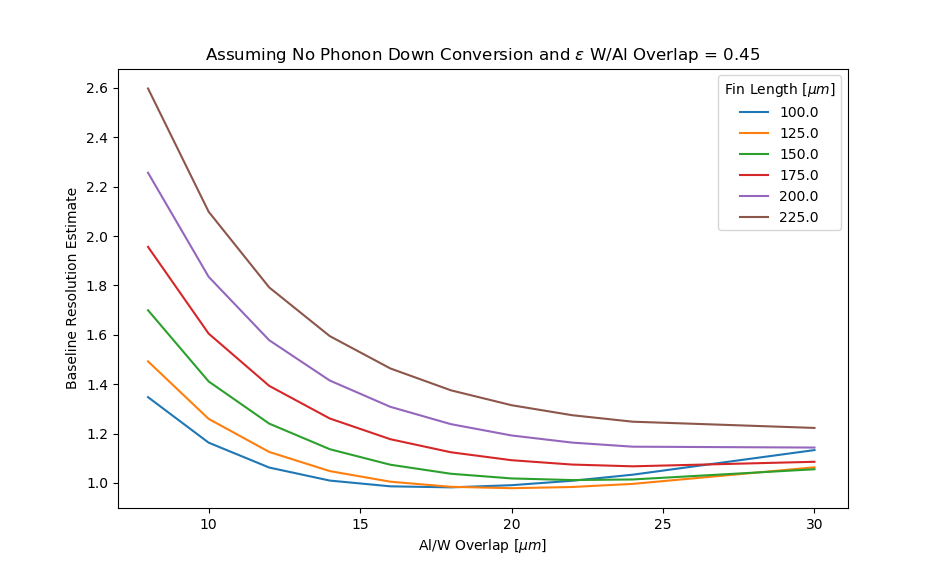

TES length  0.00014
Active Surface Area  9.286276733160164e-05
Percent Active SA  0.00992110440959447
N tes  1344
Base Resolution  1.2596881680521077
Rn  0.09999999999999996
Phonon Absorption Time  3.762410550532167e-05
Time ETF  8.544800207086224e-05


In [49]:
# Decrease Rn requirement to 100 mOhms? 
res_n = 100e-3 # want 100 mOhm 
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.5, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            print("TES length ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =7)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()